# BeerAdvocate

In [1]:
import pandas as pd
import utils
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
importlib.reload(utils)


<module 'utils' from 'c:\\Users\\jon\\Desktop\\EPFL\\MA1\\ADA\\pro_med\\ada-2024-project-mediterranean\\src\\data\\utils.py'>

## Files loading

In [2]:
beers_adv = pd.read_csv("../../data/Original/BeerAdvocate/beers.csv", sep=",")
breweries_adv = pd.read_csv("../../data/Original/BeerAdvocate/breweries.csv", sep=",")
users_adv = pd.read_csv("../../data/Original/BeerAdvocate/users.csv", sep=",")

# Data processing

### Beers

In [3]:
utils.dataset_information(beers_adv, "Beers_BA")



########################################################
We are starting analysing dataset Beers_BA
- Dimension of starting dataset: (280823, 15)
- Columns of dataset:  Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    beer_id           beer_name  brewery_id            brewery_name  \
0   166064    Nashe Moskovskoe       39912  Abdysh-Ata (Абдыш Ата)   
1   166065     Nashe Pivovskoe       39912  Abdysh-Ata (Абдыш Ата)   
2   166066  Nashe Shakhterskoe       39912  Abdysh-Ata (Абдыш Ата)   
3   166067  Nashe Zhigulevskoe       39912  Abdysh-Ata (Абдыш Ата)   
4   166063              Zhivoe       39912  Abdysh-Ata (Абдыш Ата)   

             style  nbr_

Ensurance of correct data types:

In [4]:
utils.ensure_col_types(beers_adv,
                       ['beer_id', 'brewery_id', 'nbr_ratings', 'nbr_reviews', 'nbr_matched_valid_ratings'],
                       ['abv'],
                       ['beer_name', 'brewery_name', 'style'])

In [5]:
beers_adv.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


Keep only beers that have atleast one review and one rating. Only beers that have been tried are wanted

In [6]:
beers_adv_filt = beers_adv[(beers_adv['nbr_ratings'] != 0) & (beers_adv['nbr_reviews'] != 0)].copy()

In [7]:
beers_adv_filt['nbr_ratings'].describe()

count    166649.000000
mean         49.216653
std         298.336124
min           1.000000
25%           2.000000
50%           5.000000
75%          17.000000
max       16509.000000
Name: nbr_ratings, dtype: float64

In [8]:
beers_adv_filt['nbr_reviews'].describe()

count    166649.000000
mean         15.539163
std          88.846266
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        3899.000000
Name: nbr_reviews, dtype: float64

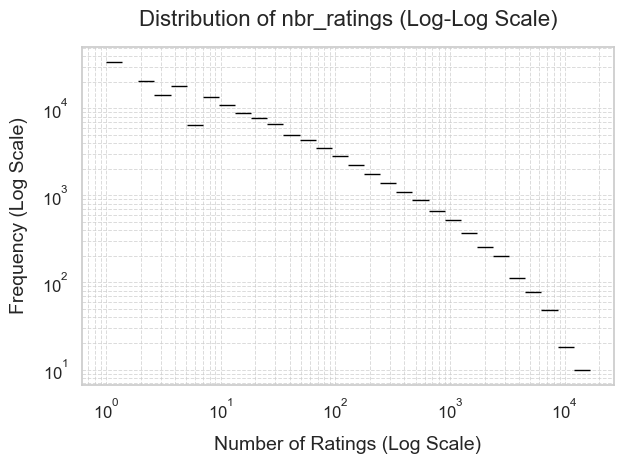

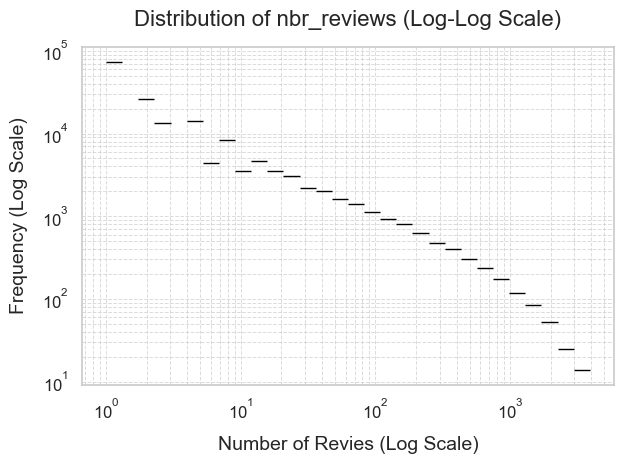

In [9]:
sns.set_theme(style="whitegrid")
sns.histplot(beers_adv_filt['nbr_ratings'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Ratings (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_ratings (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

sns.set_theme(style="whitegrid")
sns.histplot(beers_adv_filt['nbr_reviews'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Revies (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_reviews (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

In [37]:
print(beers_adv_filt['beer_id'].duplicated().any())

duplicates = beers_adv_filt[beers_adv_filt['beer_name'].duplicated(keep=False)]
non_duplicates = beers_adv_filt[~beers_adv_filt['beer_name'].duplicated(keep=False)]

duplicates = duplicates.copy()  
duplicates['duplicate_status'] = 'Duplicated'

non_duplicates = non_duplicates.copy()
non_duplicates['duplicate_status'] = 'Non-duplicated'

result_table = pd.concat([duplicates, non_duplicates]).sort_values(by='beer_name').reset_index(drop=True)

print(result_table)

True
        beer_id                                    beer_name  brewery_id  \
0        190905             Beguile Belgian-Style Blonde Ale       27946   
1        271687       Illustrated Man Dark Sour with Berries       10284   
2        253886                                    Jewelweed       36467   
3        274371                        Love In An Ella-vator       26850   
4        173753   Roselare Sour  - Aged In Bordeaux Barrels        23651   
...         ...                                          ...         ...   
331655   155810                          台.P.A. (台 Pale Ale)       38633   
331656   292026                                     日本から来たネコ       30452   
331657    70370                   横須賀ビアサケ (Yokosuka Biasake)        4973   
331658    70327                          葉山ビール (Hayama Beer)        4973   
331659    79700                          ﻿Boji Blue Pale Ale       28725   

                                  brewery_name                    style  \
0      

### Breweries

In [10]:
utils.dataset_information(breweries_adv, "Breweries_BA")



########################################################
We are starting analysing dataset Breweries_BA
- Dimension of starting dataset: (16758, 4)
- Columns of dataset:  Index(['id', 'location', 'name', 'nbr_beers'], dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: False
Head: 
       id    location                    name  nbr_beers
0  39912  Kyrgyzstan  Abdysh-Ata (Абдыш Ата)          5
1  39913  Kyrgyzstan             Arpa (АРПА)          1
2  39914  Kyrgyzstan               Bear Beer          4
3  39915  Kyrgyzstan             Blonder Pub          4
4  39916  Kyrgyzstan            Kellers Bier          2


In [11]:
breweries_adv['nbr_beers'].describe()

count    16758.000000
mean        21.056331
std         69.417841
min          0.000000
25%          2.000000
50%          6.000000
75%         18.000000
max       1196.000000
Name: nbr_beers, dtype: float64

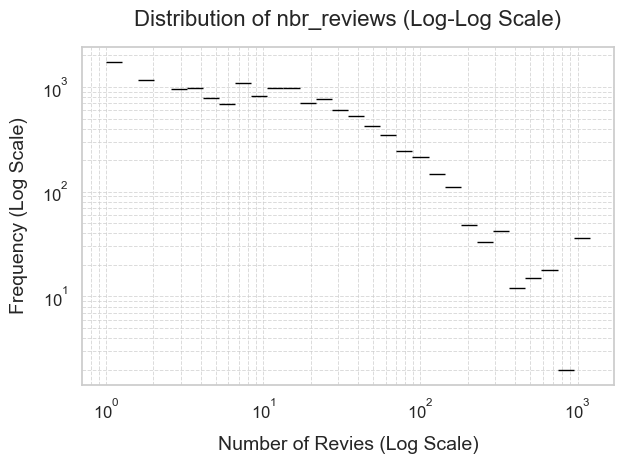

In [ ]:
sns.set_theme(style="whitegrid")
sns.histplot(breweries_adv['nbr_beers'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Beers (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_beers (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

Remove breweries with null `nbr_beers`.

In [14]:
breweries_adv_filt = breweries_adv[(breweries_adv['nbr_beers'] != 0)].copy()
breweries_adv_filt['nbr_beers'].describe()

count    14522.000000
mean        24.298444
std         74.041044
min          1.000000
25%          3.000000
50%          8.000000
75%         21.000000
max       1196.000000
Name: nbr_beers, dtype: float64

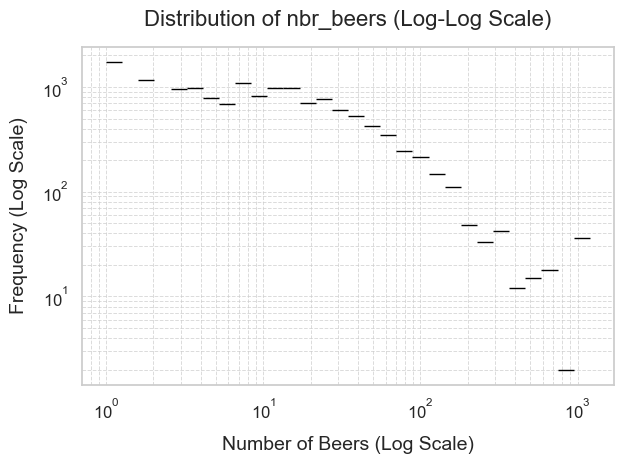

In [15]:
sns.set_theme(style="whitegrid")
sns.histplot(breweries_adv_filt['nbr_beers'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Beers (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_beers (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
breweries_adv_filt['location']

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


Now the location of a beer (country) can be introduced into the processed `beers_adv_filt` dataset:

In [27]:
breweries_adv_filt = breweries_adv_filt.rename(columns={'name': 'brewery_name'})
beers_adv_filt = beers_adv.merge(breweries_adv_filt[['brewery_name', 'location']], on='brewery_name', how='left')

In [32]:
beers_adv_filt['location'].shape

(331660,)

### Users

In [7]:
utils.dataset_information(users_adv, "Users_BA")



########################################################
We are starting analysing dataset Users_BA
- Dimension of starting dataset: (153704, 6)
- Columns of dataset:  Index(['nbr_ratings', 'nbr_reviews', 'user_id', 'user_name', 'joined',
       'location'],
      dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    nbr_ratings  nbr_reviews                user_id        user_name  \
0         7820          465         nmann08.184925          nmann08   
1         2521         2504     stjamesgate.163714      StJamesGate   
2         1797         1143          mdagnew.19527          mdagnew   
3           31           31  helloloser12345.10867  helloloser12345   
4          604          604        cypressbob.3708       cypressbob   

         joined                   location  
0  1.199704e+09  United States, Washington  
1  1.191838e+09    United States, New York  
2  1.116410e+09           Northern Ire

## Processed savings

In [34]:
utils.write_csv_into_directory('../../data/Processed/BeerAdvocate', 'beers_processed.csv', beers_adv_filt)

Dataset successfully saved to ../../data/Processed/BeerAdvocate\beers_processed.csv
